## Скачайте материалы к занятию. Проанализируйте ряды, сделайте их стационарными.

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [4]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

### 1. monthly-sales-of-company-x-jan-6

In [5]:
series = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")['Count']

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


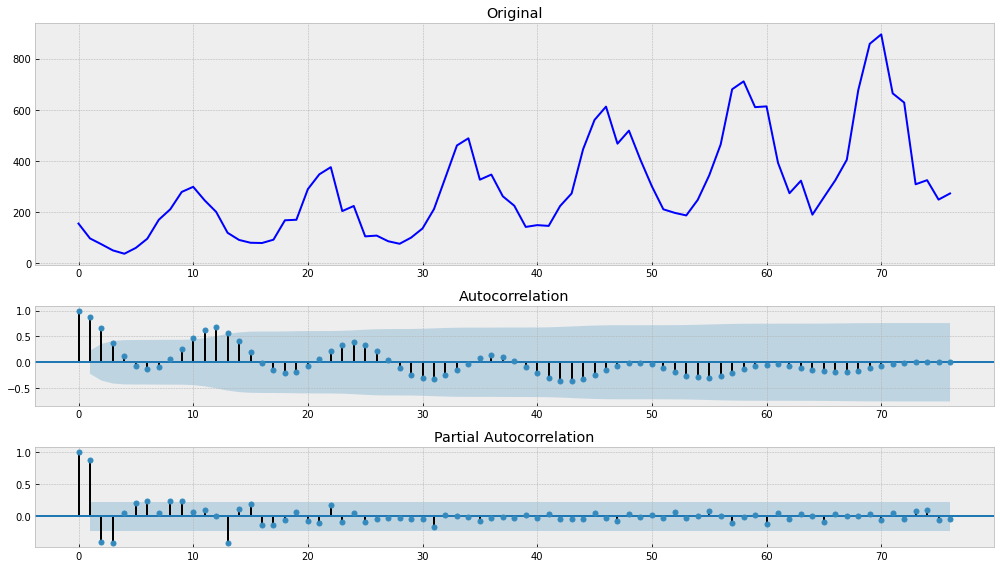

In [6]:
tsplot(series)

Уберем изменение дисперсии при помощи преобразования Бокса-Кокса

In [7]:
series = boxcox(series, 0)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


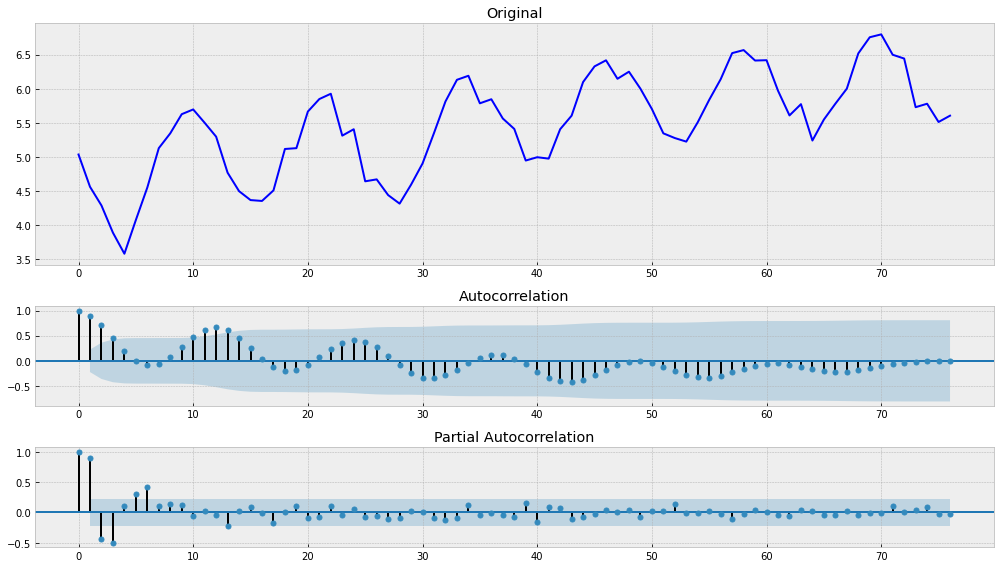

In [8]:
tsplot(series)

По графику ряда видно наличие тренда. Уберем его дифференцированием.

In [9]:
series = series[1:] - series[:-1]

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


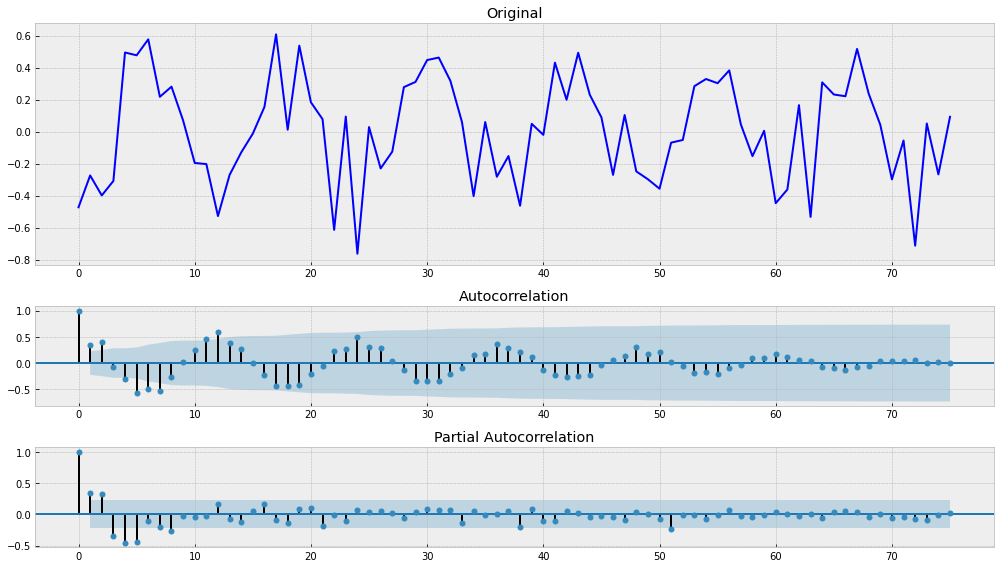

In [10]:
tsplot(series)

Видно что есть сезонность, Уберем

In [11]:
series = series[7:] - series[:-7]

Results of Dickey-Fuller Test:
Test Statistic                -8.649879e+00
p-value                        5.149751e-14
#Lags Used                     7.000000e+00
Number of Observations Used    6.100000e+01
Critical Value (1%)           -3.542413e+00
Critical Value (5%)           -2.910236e+00
Critical Value (10%)          -2.592745e+00
dtype: float64


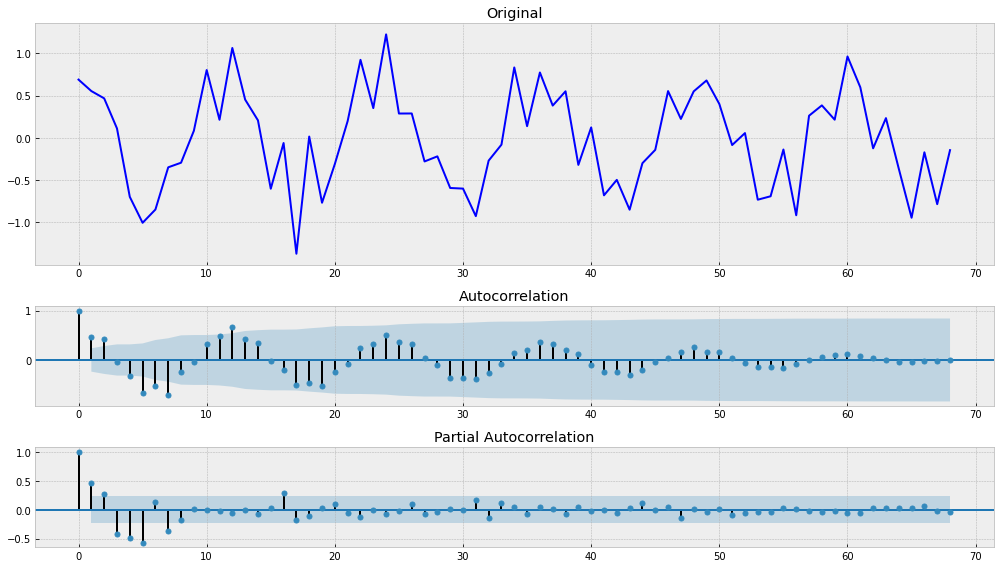

In [12]:
tsplot(series)

Видим что **p-value = 0.009963**, соответственно тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

### 2. monthly-boston-armed-robberies-j.csv

In [13]:
series = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")['Count']

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


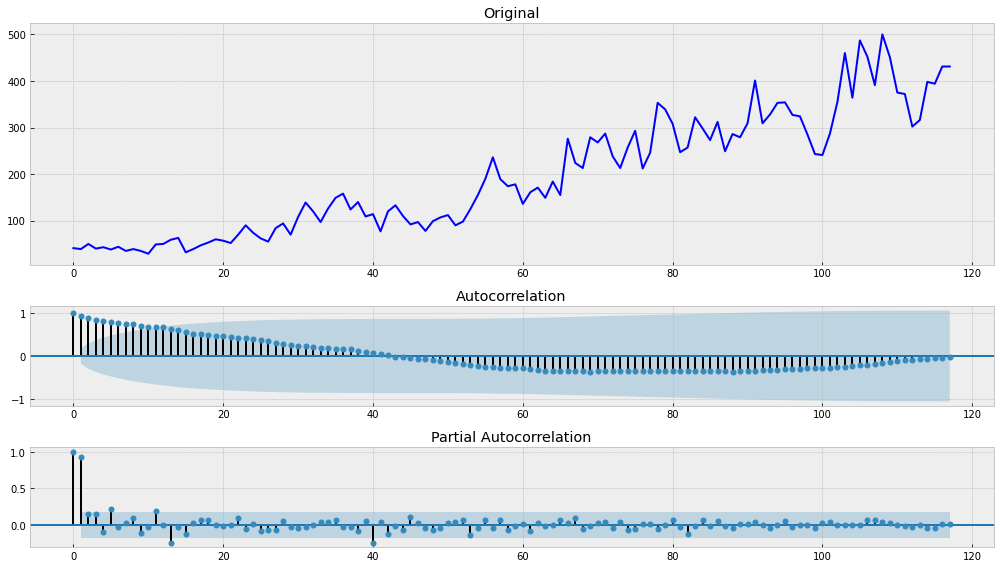

In [14]:
tsplot(series)

Уберем изменение дисперсии при помощи преобразования Бокса-Кокса

In [15]:
series = boxcox(series, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


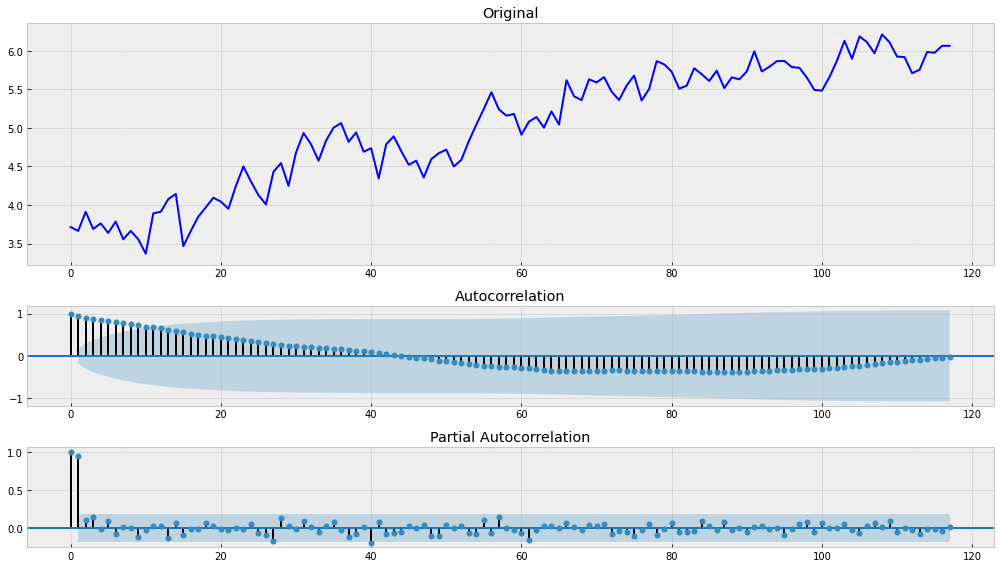

In [16]:
tsplot(series)

По графику ряда видно наличие тренда. Уберем его дифференцированием.

In [17]:
series = series[2:] - series[:-2]

Results of Dickey-Fuller Test:
Test Statistic                  -5.176674
p-value                          0.000010
#Lags Used                       9.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


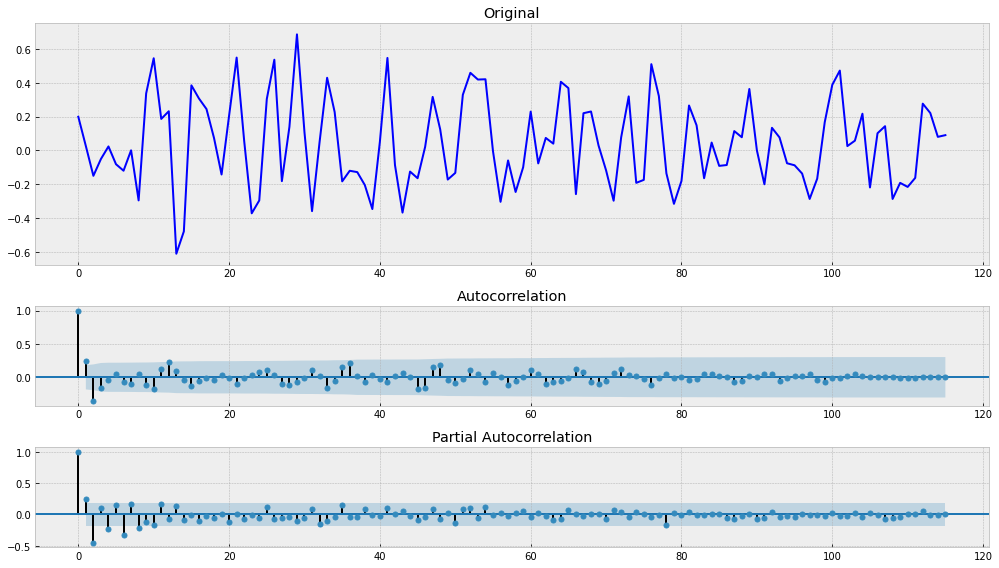

In [18]:
tsplot(series)

Видим что **p-value = 0.000010**, соответственно тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

### 3. mean-monthly-air-temperature-deg.csv

In [122]:
series = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")["Deg"]

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


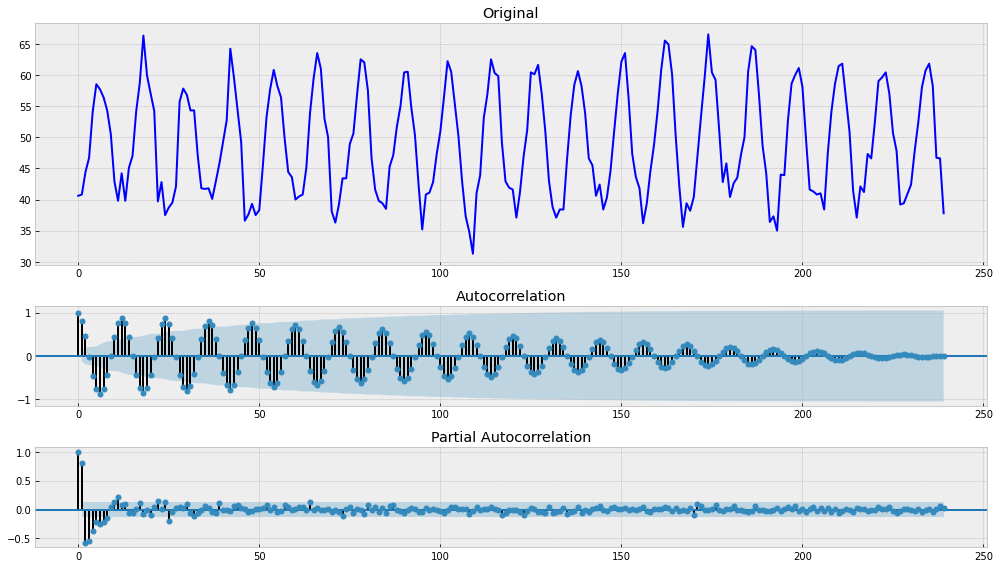

In [123]:
tsplot(series)

Уберем изменение дисперсии при помощи преобразования Бокса-Кокса

In [125]:
series = boxcox(series, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -3.859318
p-value                          0.002356
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


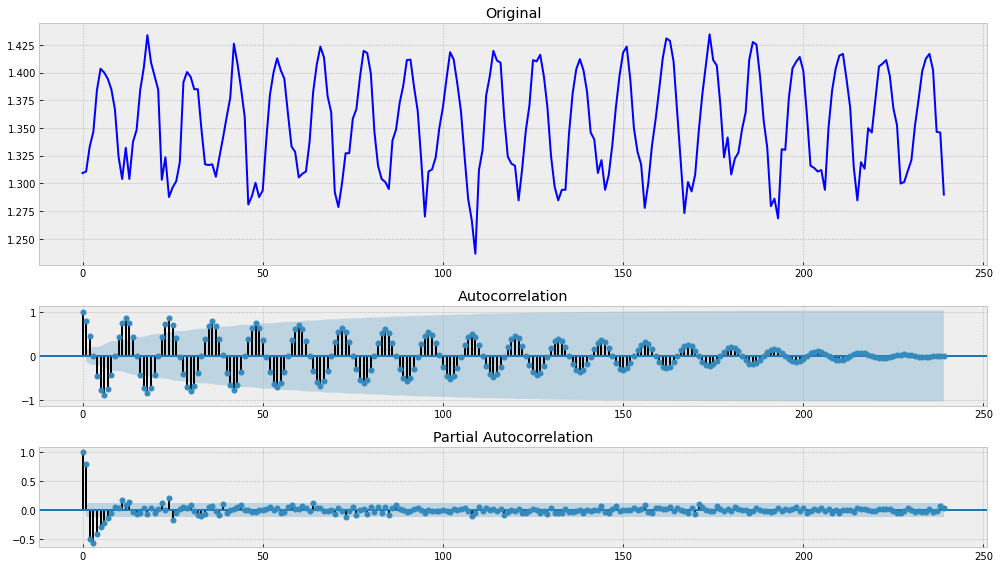

In [126]:
tsplot(series)

Видим что **p-value = 0.002356**, соответственно тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

### 4. weekly-closings-of-the-dowjones-.csv

In [136]:
series = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")["Close"]

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


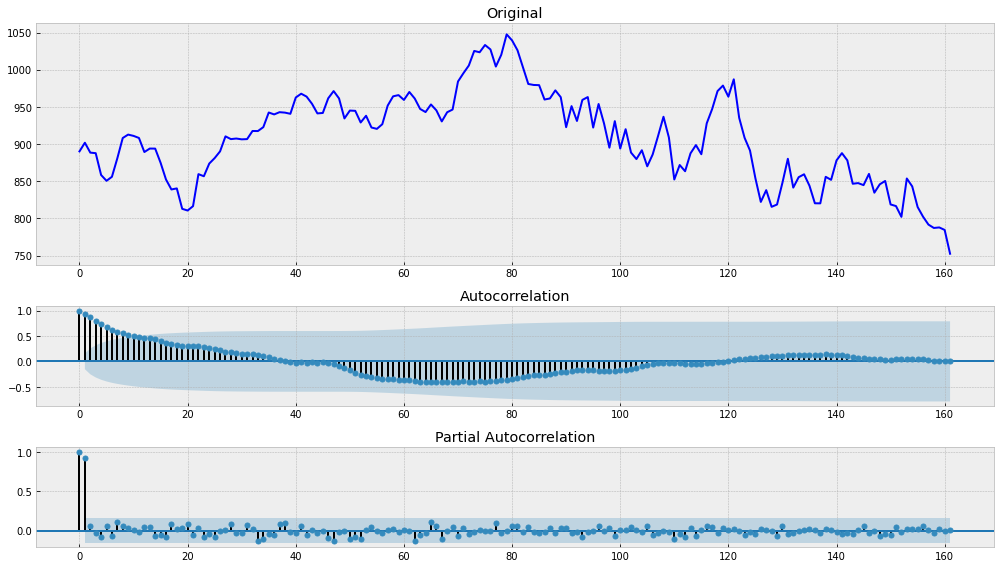

In [137]:
tsplot(series)

Уберем изменение дисперсии при помощи преобразования Бокса-Кокса

In [140]:
series = boxcox(series, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -4.353173
p-value                          0.000359
#Lags Used                       7.000000
Number of Observations Used    357.000000
Critical Value (1%)             -3.448801
Critical Value (5%)             -2.869670
Critical Value (10%)            -2.571101
dtype: float64


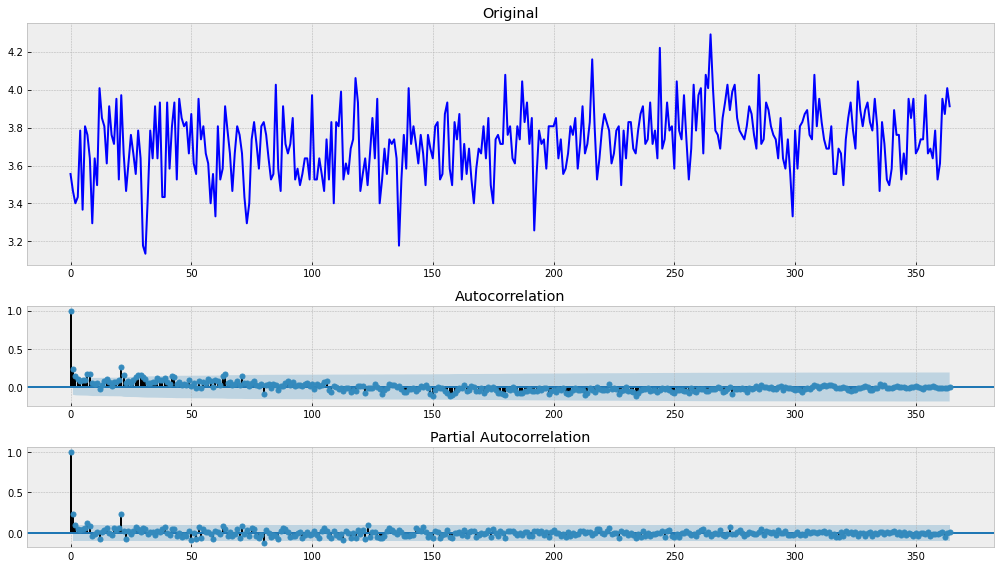

In [141]:
tsplot(series)

Видим что **p-value = 0.000359**, соответственно тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

### 5. daily-total-female-births-in-cal.csv

In [138]:
series = pd.read_csv("Series/daily-total-female-births-in-cal.csv")["Count"]

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


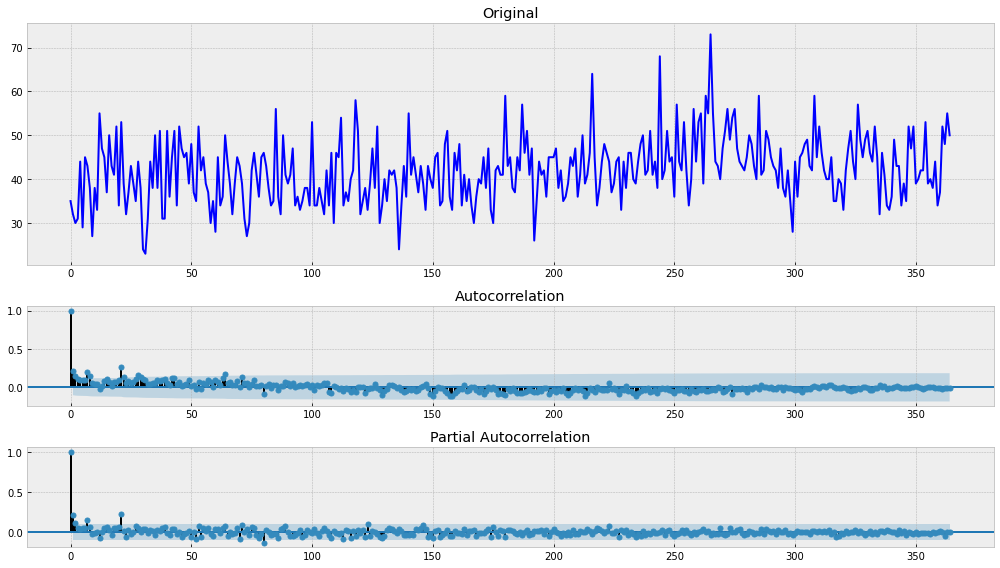

In [139]:
tsplot(series)

Видим что **p-value = 0.000052**, соответственно тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!